In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import random
from PIL import Image

In [2]:
df = pd.read_csv("../data/train.csv")
df.head()

image_id                  label variety  age
0  100330.jpg  bacterial_leaf_blight   ADT45   45
1  100365.jpg  bacterial_leaf_blight   ADT45   45
2  100382.jpg  bacterial_leaf_blight   ADT45   45
3  100632.jpg  bacterial_leaf_blight   ADT45   45
4  101918.jpg  bacterial_leaf_blight   ADT45   45

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10407 entries, 0 to 10406
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   image_id  10407 non-null  object
 1   label     10407 non-null  object
 2   variety   10407 non-null  object
 3   age       10407 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 325.3+ KB


In [4]:
for col in df.drop('image_id', axis=1).columns:
    print(f"         '{col}': unique values and shape")
    uq = df[col].unique()
    print(uq)
    print(uq.shape)

         'label': unique values and shape
['bacterial_leaf_blight' 'bacterial_leaf_streak'
 'bacterial_panicle_blight' 'blast' 'brown_spot' 'dead_heart'
 'downy_mildew' 'hispa' 'normal' 'tungro']
(10,)
         'variety': unique values and shape
['ADT45' 'IR20' 'KarnatakaPonni' 'Onthanel' 'Ponni' 'Surya' 'Zonal'
 'AndraPonni' 'AtchayaPonni' 'RR']
(10,)
         'age': unique values and shape
[45 50 55 60 65 68 70 72 47 77 67 73 75 80 62 66 57 82]
(18,)


In [5]:
df['label'].value_counts()

label
normal                      1764
blast                       1738
hispa                       1594
dead_heart                  1442
tungro                      1088
brown_spot                   965
downy_mildew                 620
bacterial_leaf_blight        479
bacterial_leaf_streak        380
bacterial_panicle_blight     337
Name: count, dtype: int64

<Axes: xlabel='label', ylabel='count'>

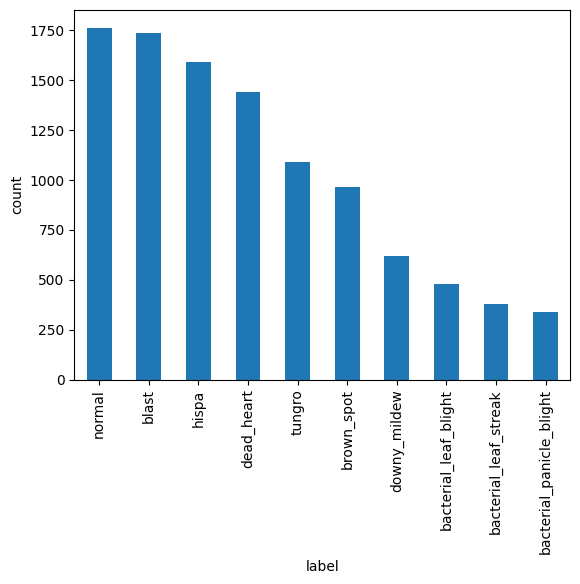

In [6]:
df['label'].value_counts().plot(kind="bar", ylabel="count")

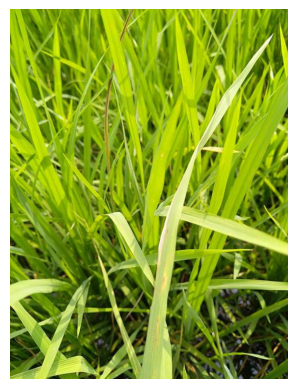

In [7]:
row = df.iloc[0]
img_path = os.path.join("..", "data", "train_images", row['label'], row['image_id'])
img = Image.open(img_path)
plt.imshow(img)
plt.axis('off')
plt.show()

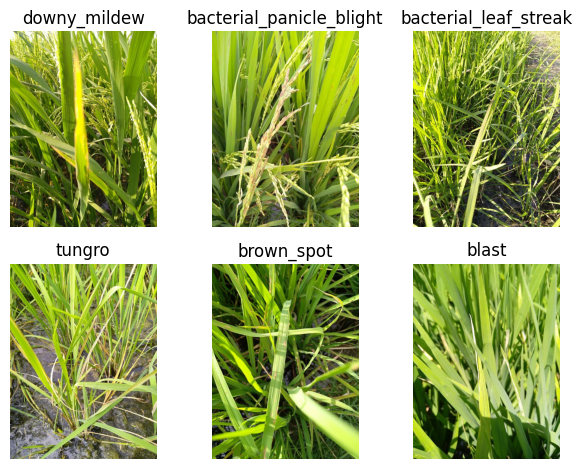

In [8]:
classes = df['label'].unique()
sampled_classes = random.sample(list(classes), 6)

for i, cls in enumerate(sampled_classes, 1):
    # just pick a random row for this class
    row = df[df['label'] == cls].sample(1).iloc[0]
    img_path = os.path.join("..", "data", "train_images", row['label'], row['image_id'])
    img = Image.open(img_path)
    plt.subplot(2, 3, i)
    plt.imshow(img)
    plt.axis('off')
    plt.title(cls)
plt.tight_layout()
plt.show()

In [9]:
dims = []
for i, row in df.iterrows():
    img_path = os.path.join("..", "data", "train_images", row['label'], row['image_id'])
    with Image.open(img_path) as img:
        w, h = img.size
        dims.append((row['image_id'], row['label'], w, h))

dim_df = pd.DataFrame(dims, columns=["image_id", "label", "width", "height"])

In [10]:
dim_df.describe()

width        height
count  10407.000000  10407.000000
mean     480.061497    639.938503
std        3.136350      3.136350
min      480.000000    480.000000
25%      480.000000    640.000000
50%      480.000000    640.000000
75%      480.000000    640.000000
max      640.000000    640.000000

In [11]:
dim_df['width'].value_counts()

width
480    10403
640        4
Name: count, dtype: int64

In [12]:
dim_df['height'].value_counts()

height
640    10403
480        4
Name: count, dtype: int64

In [13]:
dim_df.head()

image_id                  label  width  height
0  100330.jpg  bacterial_leaf_blight    480     640
1  100365.jpg  bacterial_leaf_blight    480     640
2  100382.jpg  bacterial_leaf_blight    480     640
3  100632.jpg  bacterial_leaf_blight    480     640
4  101918.jpg  bacterial_leaf_blight    480     640

In [26]:
lands = dim_df[dim_df['width'] == 640]
lands

image_id                  label  width  height
16    100622.jpg  bacterial_leaf_blight    640     480
30    103734.jpg  bacterial_leaf_blight    640     480
3400  103050.jpg             brown_spot    640     480
3408  103343.jpg             brown_spot    640     480

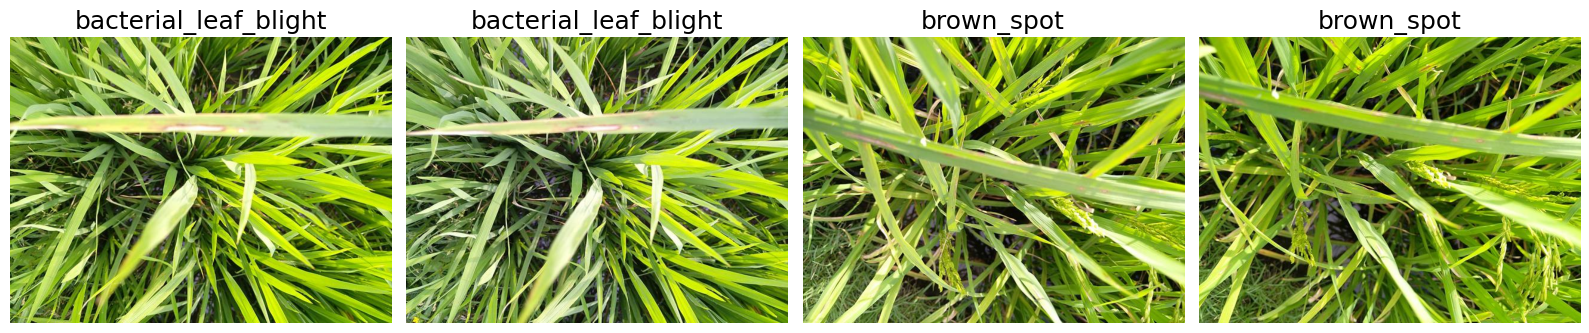

In [33]:
plt.figure(figsize=(16, 4))
for i in range(len(lands)):
    img_path = os.path.join("..", "data", "train_images", lands.iloc[i]['label'], lands.iloc[i]['image_id'])
    img = Image.open(img_path)
    plt.subplot(1,4,i+1)
    plt.imshow(img)
    plt.axis('off')
    plt.title(lands.iloc[i]['label'], fontsize=18)
plt.tight_layout()
plt.show()

In [ ]:
hoz = dim_df[:4]


In [ ]:
classes = df['label'].unique()
sampled_classes = random.sample(list(classes), 6)

for i, cls in enumerate(sampled_classes, 1):
    # just pick a random row for this class
    row = df[df['label'] == cls].sample(1).iloc[0]
    img_path = os.path.join("..", "data", "train_images", row['label'], row['image_id'])
    img = Image.open(img_path)
    plt.subplot(2, 3, i)
    plt.imshow(img)
    plt.axis('off')
    plt.title(cls)
plt.tight_layout()
plt.show()

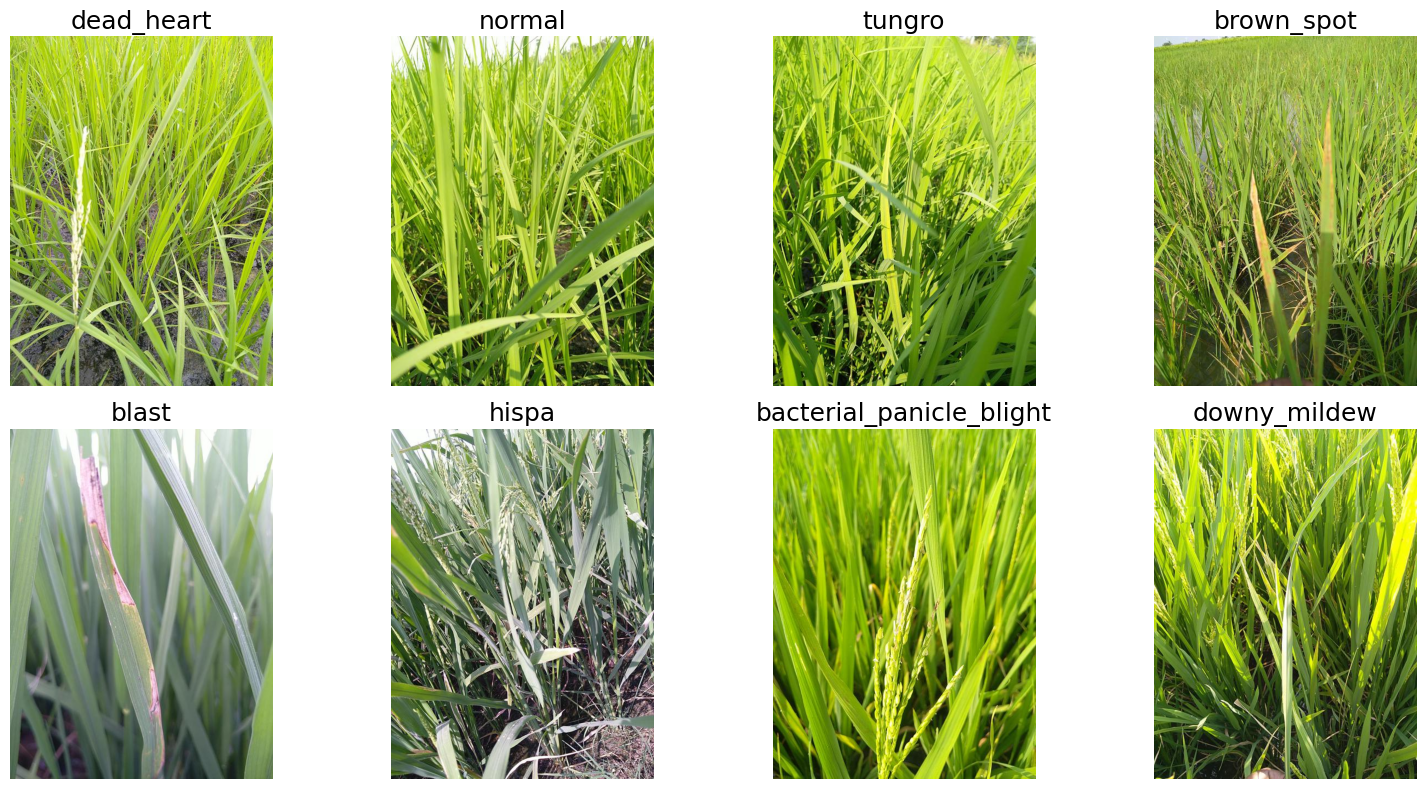

In [40]:
sampled_classes = random.sample(list(classes), 8)
plt.figure(figsize=(16, 8))
for i, cls in enumerate(sampled_classes, 1):
    row = df[df['label'] == cls].sample(1).iloc[0]
    img_path = os.path.join("..", "data", "train_images", row['label'], row['image_id'])
    img = Image.open(img_path)
    plt.subplot(2,4,i)
    plt.imshow(img)
    plt.axis('off')
    plt.title(row['label'], fontsize=18)
plt.tight_layout()
plt.show()